# Preparación de datos para revisión y categorización

## Recepción y validación de distribución inicial

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import openpyxl
import numpy as np

In [4]:
data = pd.read_excel('DATA_TFM.xlsx')

In [5]:
len(data)

194878

In [6]:
data = data.drop(["NOMBRE DOCENTE", "RESPUESTA", "PEUN_ID"], axis=1)
data = data.dropna(subset=["RESPUESTA ABIERTA"])
data

,UNIDAD,FACULTAD,PROGRAMA,MATERIA,PREGUNTA,RESPUESTA ABIERTA,ANIO
0,"UNIDAD REGIONAL, SECCIONAL GIRARDOT",FACULTAD DE CIENCIAS DE LA SALUD,ENFERMERIA 2009,PROFUNDIZACION I,¿Qué aspectos positivos destaca el profesor?,La docente tiene un amplio conocimiento en el ...,2024 - 1
1,"UNIDAD REGIONAL, SECCIONAL GIRARDOT",FACULTAD DE CIENCIAS DE LA SALUD,ENFERMERIA 2009,PROFUNDIZACION I,¿En cuales aspectos considera que debería mejo...,en concretar tiempos de revision documental.,2024 - 1
2,"UNIDAD REGIONAL, SECCIONAL GIRARDOT",FACULTAD DE CIENCIAS DE LA SALUD,ENFERMERIA 2009,PROFUNDIZACION I,¿En cuales aspectos considera que debería mejo...,Comunicacion,2024 - 1
3,"UNIDAD REGIONAL, SECCIONAL GIRARDOT",FACULTAD DE CIENCIAS DE LA SALUD,ENFERMERIA 2009,PROFUNDIZACION I,¿En cuales aspectos considera que debería mejo...,Prestar mas atencion a sus estudiantes cuando ...,2024 - 1
4,"UNIDAD REGIONAL, SECCIONAL GIRARDOT",FACULTAD DE CIENCIAS DE LA SALUD,ENFERMERIA 2009,PROFUNDIZACION I,¿Qué aspectos positivos destaca el profesor?,Responsable y comprometida con la ensenanza,2024 - 1
...,...,...,...,...,...,...,...
194873,"UNIDAD REGIONAL, EXTENSIÓN FACATATIVÁ",FACULTAD DE CIENCIAS AGROPECUARIAS,INGENIERIA AGRONOMICA 2020 - EXT. FACATATIVA,INTRODUCCION A LAS CIENCIAS AGRARIAS,¿Qué aspectos positivos destaca el profesor?,Sabe mucho del tema,2024 - 2
194874,"UNIDAD REGIONAL, EXTENSIÓN FACATATIVÁ",FACULTAD DE CIENCIAS AGROPECUARIAS,INGENIERIA AGRONOMICA 2020 - EXT. FACATATIVA,PRODUCCION DE CULTIVOS,¿Qué aspectos positivos destaca el profesor?,Sin opinion,2024 - 1
194875,"UNIDAD REGIONAL, EXTENSIÓN FACATATIVÁ",FACULTAD DE CIENCIAS AGROPECUARIAS,INGENIERIA AGRONOMICA 2020 - EXT. FACATATIVA,PRODUCCION DE CULTIVOS,¿En cuales aspectos considera que debería mejo...,Ninguno,2024 - 1
194876,"UNIDAD REGIONAL, EXTENSIÓN FACATATIVÁ",FACULTAD DE CIENCIAS AGROPECUARIAS,INGENIERIA AGRONOMICA 2020 - EXT. FACATATIVA,PRODUCCION DE CULTIVOS,¿Qué aspectos positivos destaca el profesor?,.,2024 - 1


In [7]:
len(data["PROGRAMA"].unique())

47

In [8]:
unidades = {'UNIDAD REGIONAL, SECCIONAL GIRARDOT':'GIRARDOT',
            'UNIDAD REGIONAL, SEDE FUSAGASUGÁ':'FUSAGASUGA',
            'UNIDAD REGIONAL, SECCIONAL UBATÉ':'UBATE',
            'UNIDAD REGIONAL, EXTENSIÓN FACATATIVÁ':'FACATATIVA',
            'UNIDAD REGIONAL, EXTENSIÓN CHÍA':'CHIA',
            'UNIDAD REGIONAL, EXTENSIÓN SOACHA':'SOACHA',
            'UNIDAD REGIONAL, EXTENSIÓN ZIPAQUIRÁ':'ZIPAQUIRA'}

facultades = {
    'FACULTAD DE CIENCIAS DE LA SALUD':'SALUD',
    'FACULTAD DE CIENCIAS ADMINISTRATIVAS ECONÓMICAS Y CONTABLES':'ADMINISTRACION',
    'FACULTAD DE EDUCACIÓN':'EDUCACION',
    'FACULTAD DE CIENCIAS AGROPECUARIAS':'AGROPECUARIAS',
    'TRASVERSALES':'TRASVERSALES',
    'FACULTAD DE INGENIERÍA':'INGENIERIA',
    'FACULTAD DE CIENCIAS SOCIALES, HUMANIDADES Y CIENCIAS POLITICAS':'SOCIALES',
    'FACULTAD DE CIENCIAS DEL DEPORTE Y EDUCACIÓN FÍSICA':'EDUCACION FISICA',
}

data["UNIDAD"] = data["UNIDAD"].map(unidades)
data["FACULTAD"] = data["FACULTAD"].map(facultades)
data

,UNIDAD,FACULTAD,PROGRAMA,MATERIA,PREGUNTA,RESPUESTA ABIERTA,ANIO
0,GIRARDOT,SALUD,ENFERMERIA 2009,PROFUNDIZACION I,¿Qué aspectos positivos destaca el profesor?,La docente tiene un amplio conocimiento en el ...,2024 - 1
1,GIRARDOT,SALUD,ENFERMERIA 2009,PROFUNDIZACION I,¿En cuales aspectos considera que debería mejo...,en concretar tiempos de revision documental.,2024 - 1
2,GIRARDOT,SALUD,ENFERMERIA 2009,PROFUNDIZACION I,¿En cuales aspectos considera que debería mejo...,Comunicacion,2024 - 1
3,GIRARDOT,SALUD,ENFERMERIA 2009,PROFUNDIZACION I,¿En cuales aspectos considera que debería mejo...,Prestar mas atencion a sus estudiantes cuando ...,2024 - 1
4,GIRARDOT,SALUD,ENFERMERIA 2009,PROFUNDIZACION I,¿Qué aspectos positivos destaca el profesor?,Responsable y comprometida con la ensenanza,2024 - 1
...,...,...,...,...,...,...,...
194873,FACATATIVA,AGROPECUARIAS,INGENIERIA AGRONOMICA 2020 - EXT. FACATATIVA,INTRODUCCION A LAS CIENCIAS AGRARIAS,¿Qué aspectos positivos destaca el profesor?,Sabe mucho del tema,2024 - 2
194874,FACATATIVA,AGROPECUARIAS,INGENIERIA AGRONOMICA 2020 - EXT. FACATATIVA,PRODUCCION DE CULTIVOS,¿Qué aspectos positivos destaca el profesor?,Sin opinion,2024 - 1
194875,FACATATIVA,AGROPECUARIAS,INGENIERIA AGRONOMICA 2020 - EXT. FACATATIVA,PRODUCCION DE CULTIVOS,¿En cuales aspectos considera que debería mejo...,Ninguno,2024 - 1
194876,FACATATIVA,AGROPECUARIAS,INGENIERIA AGRONOMICA 2020 - EXT. FACATATIVA,PRODUCCION DE CULTIVOS,¿Qué aspectos positivos destaca el profesor?,.,2024 - 1


<Axes: ylabel='Proporción por año'>

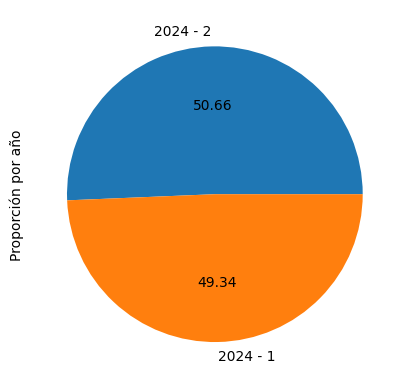

In [9]:
data["ANIO"].value_counts(normalize=True).plot(kind='pie', ylabel='Proporción por año', autopct = '%.2f')

<Axes: ylabel='proporción por facultad'>

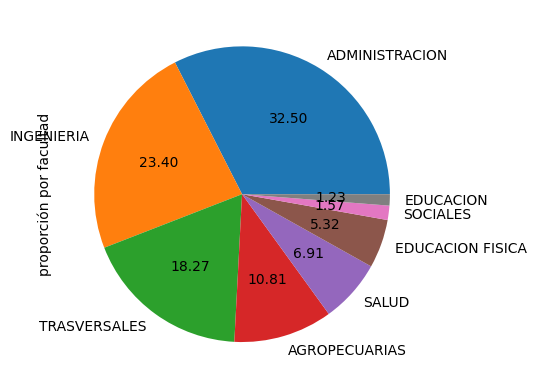

In [10]:
data["FACULTAD"].value_counts(normalize=True).plot(kind='pie', ylabel = "proporción por facultad", autopct = '%.2f')

<Axes: ylabel='proportion'>

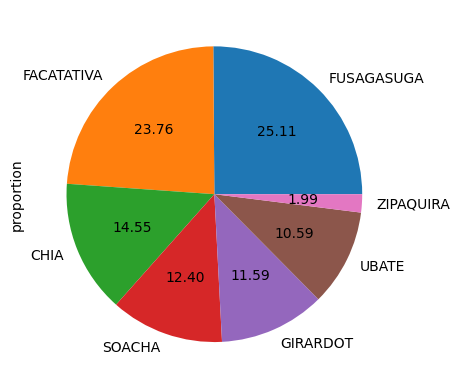

In [11]:
data["UNIDAD"].value_counts(normalize=True).plot(kind= 'pie', autopct = '%.2f')

<Axes: ylabel='proportion'>

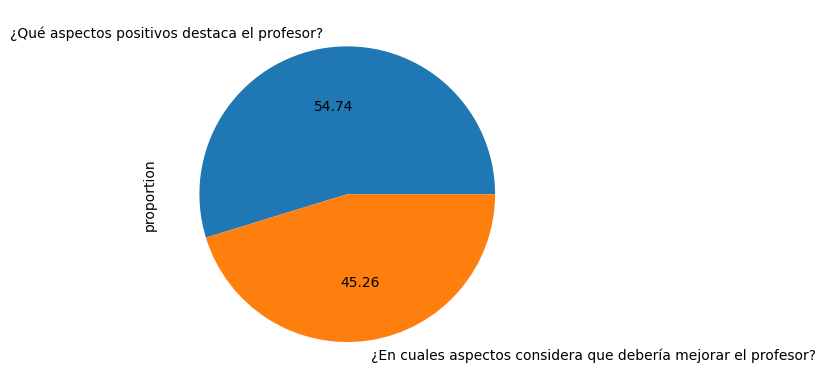

In [12]:
data["PREGUNTA"].value_counts(normalize=True).plot(kind= 'pie', autopct = '%.2f')

# Normalización de texto, estandarizado y representación

In [13]:
import re
from spellchecker import SpellChecker

In [14]:
def corregir_ortografia(texto, lenguaje = 'es'):
    spell = SpellChecker(language=lenguaje)
    palabras = re.findall(r'\w+', texto)
    palabras_corregidas = []
    for palabra in palabras:
        correccion = spell.correction(palabra)
        if correccion:
            palabras_corregidas.append(correccion)
        else:
            palabras_corregidas.append(palabra)
    return ' '.join(palabras_corregidas)

In [15]:
data["RESPUESTA ABIERTA"] = data["RESPUESTA ABIERTA"].apply(lambda x:  corregir_ortografia(x))

In [16]:
data_clasificatoria = pd.DataFrame({'Respuesta':data["RESPUESTA ABIERTA"], 'Pregunta':data["PREGUNTA"]})

In [17]:
data_clasificatoria.to_excel('Data_Limpia_Reseñas_tfm.xlsx', engine ='openpyxl')

In [18]:
data["RESPUESTA ABIERTA"] = data["RESPUESTA ABIERTA"].apply(lambda x : x.lower())

In [19]:
data["RESPUESTA ABIERTA"] = data["RESPUESTA ABIERTA"].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [20]:
data["RESPUESTA ABIERTA"] = data["RESPUESTA ABIERTA"].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))

In [21]:
data["RESPUESTA ABIERTA"] = data["RESPUESTA ABIERTA"].str.strip().replace('', np.nan)
data["RESPUESTA ABIERTA"] = data["RESPUESTA ABIERTA"].dropna()

In [22]:
data_limpia = data.dropna()

In [23]:
len(data_limpia)

177740

In [24]:
patron = r'^(.)\1+$'
mascara = data_limpia["RESPUESTA ABIERTA"].astype(str).str.match(patron)


data_sin_letras_repetidas = data_limpia[~mascara]


data_sin_letras_repetidas

,UNIDAD,FACULTAD,PROGRAMA,MATERIA,PREGUNTA,RESPUESTA ABIERTA,ANIO
0,GIRARDOT,SALUD,ENFERMERIA 2009,PROFUNDIZACION I,¿Qué aspectos positivos destaca el profesor?,la docente tizne un amplio conocimiento en el ...,2024 - 1
1,GIRARDOT,SALUD,ENFERMERIA 2009,PROFUNDIZACION I,¿En cuales aspectos considera que debería mejo...,en concretar tiempo de revisión documental,2024 - 1
2,GIRARDOT,SALUD,ENFERMERIA 2009,PROFUNDIZACION I,¿En cuales aspectos considera que debería mejo...,comunicación,2024 - 1
3,GIRARDOT,SALUD,ENFERMERIA 2009,PROFUNDIZACION I,¿En cuales aspectos considera que debería mejo...,prestar mas atención a sus estudiante cuando r...,2024 - 1
4,GIRARDOT,SALUD,ENFERMERIA 2009,PROFUNDIZACION I,¿Qué aspectos positivos destaca el profesor?,responsable y comprometida con la enseñanza,2024 - 1
...,...,...,...,...,...,...,...
194872,FACATATIVA,AGROPECUARIAS,INGENIERIA AGRONOMICA 2020 - EXT. FACATATIVA,INTRODUCCION A LAS CIENCIAS AGRARIAS,¿Qué aspectos positivos destaca el profesor?,guía de forma continua el proceso educativo de...,2024 - 2
194873,FACATATIVA,AGROPECUARIAS,INGENIERIA AGRONOMICA 2020 - EXT. FACATATIVA,INTRODUCCION A LAS CIENCIAS AGRARIAS,¿Qué aspectos positivos destaca el profesor?,saber mucho del tema,2024 - 2
194874,FACATATIVA,AGROPECUARIAS,INGENIERIA AGRONOMICA 2020 - EXT. FACATATIVA,PRODUCCION DE CULTIVOS,¿Qué aspectos positivos destaca el profesor?,sin opinión,2024 - 1
194875,FACATATIVA,AGROPECUARIAS,INGENIERIA AGRONOMICA 2020 - EXT. FACATATIVA,PRODUCCION DE CULTIVOS,¿En cuales aspectos considera que debería mejo...,ninguno,2024 - 1


In [25]:
data_limpia_excel = data_sin_letras_repetidas.to_excel('Data_final_para_merge.xlsx')

In [26]:
data_clasificatoria_excel = pd.DataFrame({'Respuesta':data_sin_letras_repetidas["RESPUESTA ABIERTA"], 'Pregunta':data_sin_letras_repetidas["PREGUNTA"]})
data_clasificatoria_excel.to_excel('Data_Limpia_Reseñas_tfm_filtrada.xlsx', engine ='openpyxl')

# Primera categorización de datos

In [27]:
from pysentimiento import create_analyzer

analyzer = create_analyzer(task='sentiment', lang = 'es')
emotion_analyzer = create_analyzer(task='emotion', lang='es')

d:\Pruebas IA\TFM\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
data['RESPUESTA ABIERTA'][0]

'la docente tizne un amplio conocimiento en el abordaje de salud sexual y recreativa'

In [29]:
analyzer.predict(data['RESPUESTA ABIERTA'][0])

AnalyzerOutput(output=POS, probas={POS: 0.497, NEU: 0.473, NEG: 0.030})

In [30]:
emotion_analyzer.predict(data['RESPUESTA ABIERTA'][4]).output

'joy'

In [31]:
data['Etiqueta'] = data['RESPUESTA ABIERTA'].apply(lambda x: analyzer.predict(x).output)

TypeError: 'float' object is not iterable

<Axes: title={'center': 'sentimiento en la evaluación docente'}>

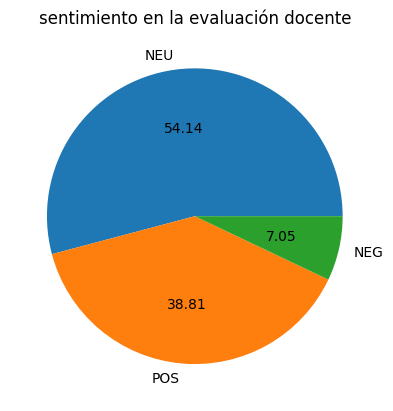

In [ ]:
data['Etiqueta'].value_counts().plot(kind = 'pie', autopct = '%.2f', title="sentimiento en la evaluación docente", ylabel= '')

In [ ]:
data['Etiqueta_Emocion'] = data['RESPUESTA ABIERTA'].apply(lambda x: emotion_analyzer.predict(x).output)

<Axes: xlabel='Etiqueta_Emocion'>

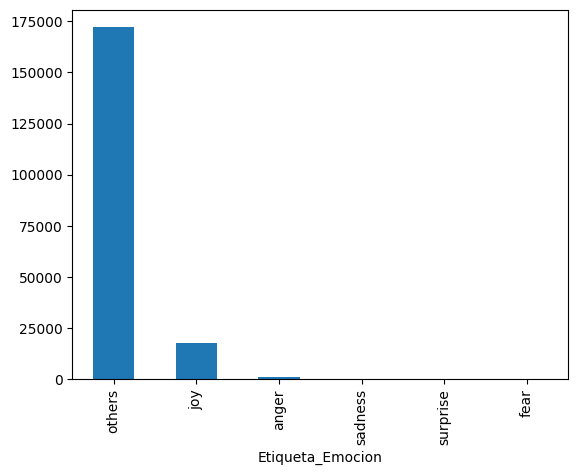

In [ ]:
data['Etiqueta_Emocion'].value_counts().plot(kind = 'bar')

# Generación de resultados tras preprocesado de datos

In [ ]:
from pysentimiento.preprocessing import preprocess_tweet

In [ ]:
preprocess_tweet(data['RESPUESTA ABIERTA'][0])

'la docente tizne un amplio conocimiento en el abordaje de salud sexual y recreativa'

In [ ]:
data['texto_preprocess'] = data['RESPUESTA ABIERTA'].apply(lambda x: preprocess_tweet(x))

In [ ]:
data['Etiqueta_Emocion_pre'] = data['texto_preprocess'].apply(lambda x: emotion_analyzer.predict(x).output)

<Axes: xlabel='Etiqueta_Emocion_pre'>

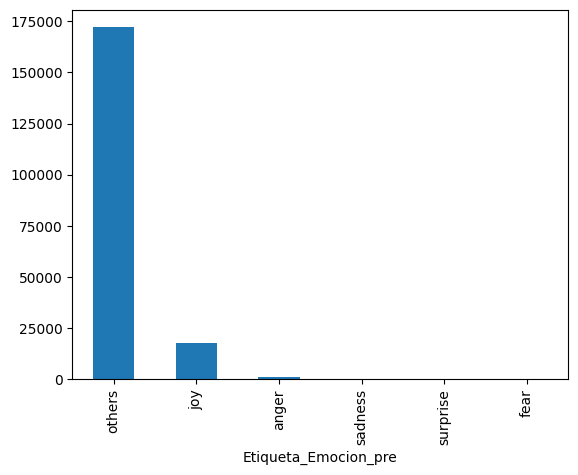

In [ ]:
data['Etiqueta_Emocion_pre'].value_counts().plot(kind = 'bar')